In [2]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import files

# Uploading the file
uploaded = files.upload()

# Plot styling
sns.set()
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Importing the dataset
data = pd.read_csv("movie_metadata.csv")
print(data.shape)
print(data.head())


Saving movie_metadata.csv to movie_metadata.csv
(5043, 28)
   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.

In [3]:
data['director_facebook_likes']
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
newdata= data.iloc[:,4:6]
newdata

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN
...,...,...
5038,2.0,318.0
5039,NaN,319.0
5040,0.0,0.0
5041,0.0,489.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[  153.94452806   424.19264674]
 [17544.11764706   598.77941176]
 [  210.77011494 11126.43678161]
 [17545.45454545 14545.45454545]
 [12441.17647059   604.34313725]]
[0 0 0 ... 0 0 0]
4919
<class 'numpy.ndarray'>
{0: 4651, 1: 68, 2: 87, 3: 11, 4: 102}


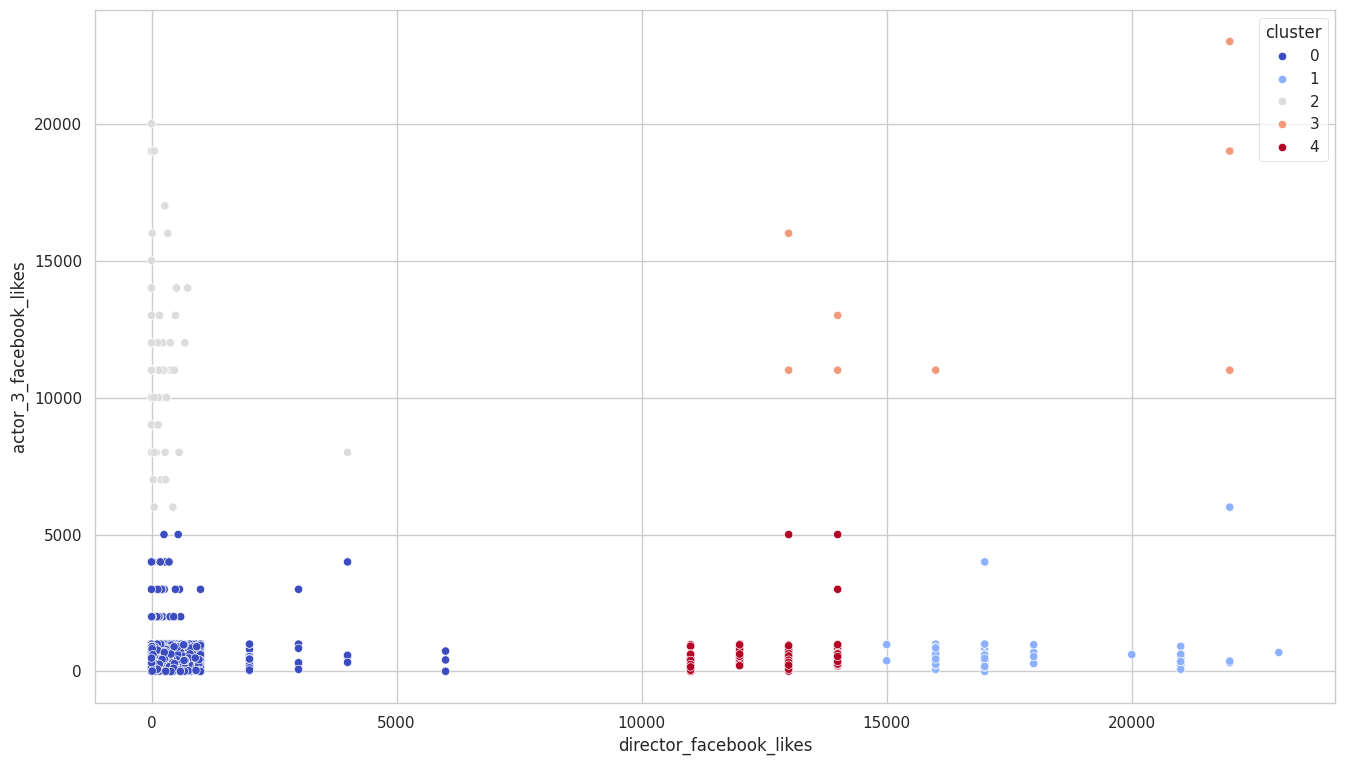

In [7]:
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Drop NaN values and reassign to newdata
newdata = newdata.dropna()

# Initialize KMeans with the appropriate number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the model
kmeans.fit(newdata)

# Print the cluster centers
print(kmeans.cluster_centers_)

# Print the labels
print(kmeans.labels_)

# Print the length of the labels array
print(len(kmeans.labels_))

# Print the type of the labels array
print(type(kmeans.labels_))

# Get the unique labels and their counts
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

# Plot the data with clusters
newdata['cluster'] = kmeans.labels_

# Scatter plot of the clusters
sns.set_style('whitegrid')
sns.scatterplot(x='director_facebook_likes', y='actor_3_facebook_likes', data=newdata, hue='cluster', palette='coolwarm')
plt.show()
